## Quantium Virtual Internship
Retail Strategy and Analytics - Task 1

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import xlrd

In [2]:
#Import Dataset
path1 = "C:/Users/Alifia/Downloads/QVI_transaction_data.csv"
path2 = "C:/Users/Alifia/Downloads/QVI_purchase_behaviour.csv"

transaction_df = pd.read_csv(path1)
customer_df = pd.read_csv(path2)
print("Rows: %d and Columns: %d in transaction data" %transaction_df.shape)
print("Rows: %d and Columns: %d in customer data" %customer_df.shape)

Rows: 264836 and Columns: 8 in transaction data
Rows: 72637 and Columns: 3 in customer data


## Data Preprocessing

In [3]:
#check if there are inappropriate data types and missing values in transaction data
print("Data type info: \n", transaction_df.dtypes)
print("Missing values info:\n",transaction_df.isnull().sum())
transaction_df.head()

Data type info: 
 DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object
Missing values info:
 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
#check if there are inappropriate data types and missing values in customer data
print("Data type info: \n", customer_df.dtypes)
print("Missing values info:\n",customer_df.isnull().sum())
customer_df.head()

Data type info: 
 LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object
Missing values info:
 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


### Date Column

In [5]:
#test to transform the date format
from datetime import date, timedelta
e = 43390
date = datetime.date(1899,12,30) + datetime.timedelta(e)
date

datetime.date(2018, 10, 17)

In [6]:
# converting the integers to datetime format 

dat = []

for i in transaction_df.DATE:
    dt= datetime.date(1899,12,30) + datetime.timedelta(i)
    
    dat.append(dt)

transaction_df["DATE"]= pd.DataFrame(dat,columns=['date'])
transaction_df["DATE"].head() 

0    2018-10-17
1    2019-05-14
2    2019-05-20
3    2018-08-17
4    2018-08-18
Name: DATE, dtype: object

In [7]:
#Replace the "DATE" datatype
transaction_df['DATE']= pd.to_datetime(transaction_df['DATE'])
print(transaction_df.dtypes)
transaction_df.head()

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### PROD_NAME Column

In [8]:
transaction_df["PROD_NAME"]

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [9]:
#remove the digits and gram(g) int the PROD_NAME column

transaction_df['PROD_NAME'] = transaction_df.PROD_NAME.str.split('\d+').str[0]
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8


In [10]:
#turn all the word in lower case
transaction_df["PROD_NAME"] = transaction_df["PROD_NAME"].apply(lambda x: ' '.join(x.lower() for x in x.split()))
transaction_df["PROD_NAME"].head()

0            natural chip compny seasalt
1                       ccs nacho cheese
2       smiths crinkle cut chips chicken
3       smiths chip thinly s/cream&onion
4    kettle tortilla chpshny&jlpno chili
Name: PROD_NAME, dtype: object

In [11]:
#replace the re into ' '
transaction_df["PROD_NAME"] = transaction_df["PROD_NAME"].str.replace('[^\w\s]','')
transaction_df["PROD_NAME"].head(10)

0           natural chip compny seasalt
1                      ccs nacho cheese
2      smiths crinkle cut chips chicken
3        smiths chip thinly screamonion
4    kettle tortilla chpshnyjlpno chili
5     old el paso salsa dip tomato mild
6    smiths crinkle chips salt  vinegar
7              grain waves sweet chilli
8    doritos corn chip mexican jalapeno
9          grain waves sour creamchives
Name: PROD_NAME, dtype: object

In [12]:
#remove the salsa and dipping product
transaction_df[~transaction_df["PROD_NAME"].str.contains('salsa|dip')]
transaction_df["PROD_NAME"].head(10)

0           natural chip compny seasalt
1                      ccs nacho cheese
2      smiths crinkle cut chips chicken
3        smiths chip thinly screamonion
4    kettle tortilla chpshnyjlpno chili
5     old el paso salsa dip tomato mild
6    smiths crinkle chips salt  vinegar
7              grain waves sweet chilli
8    doritos corn chip mexican jalapeno
9          grain waves sour creamchives
Name: PROD_NAME, dtype: object

### All Columns with number values

In [13]:
transaction_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [14]:
#Calculate IQR
Q1 = transaction_df.quantile(0.25)
Q3 = transaction_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

STORE_NBR            133.00
LYLTY_CARD_NBR    133073.25
TXN_ID            135099.75
PROD_NBR              57.00
PROD_QTY               0.00
TOT_SALES              3.80
dtype: float64


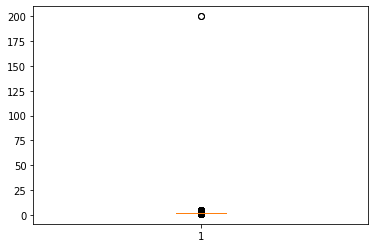

In [15]:
"PROD_QTY boxplot"
plt.boxplot(transaction_df["PROD_QTY"])
plt.show()

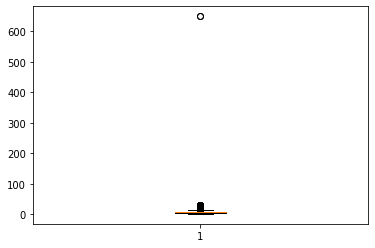

In [16]:
#TOT_SALES boxplot
plt.boxplot(transaction_df["TOT_SALES"])
plt.show()

C:\Users\Alifia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alifia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


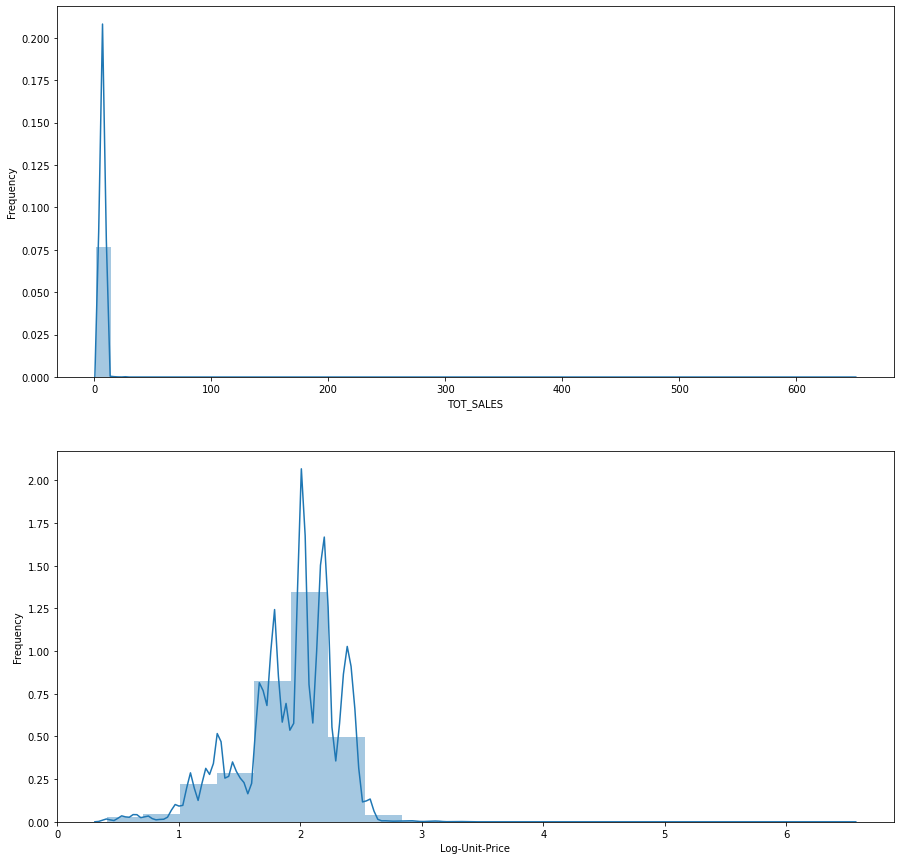

In [17]:
#see the distribution
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(transaction_df.TOT_SALES, ax=ax[0])
ax[0].set_ylabel('Frequency')
sns.distplot(np.log(transaction_df.TOT_SALES), ax=ax[1], bins=20)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Unit-Price");

In [18]:
#Take the exponent of -2 and 3 as it is the range of the distribution
#in log-Unit-Price
np.exp(0),np.exp(3)

(1.0, 20.085536923187668)

In [19]:
#Only take the price value from range of 0.1 to 20
transaction_df = transaction_df.loc[(transaction_df.TOT_SALES > 1) & (transaction_df.TOT_SALES < 20)]

C:\Users\Alifia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alifia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


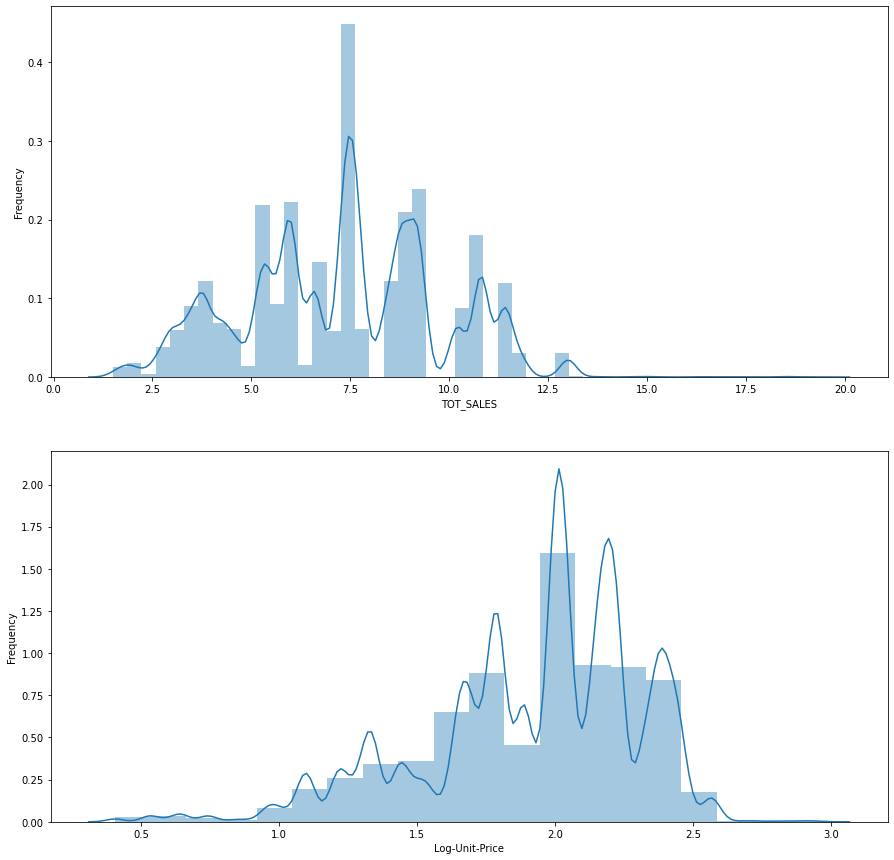

In [20]:
#see the distribution
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(transaction_df.TOT_SALES, ax=ax[0])
ax[0].set_ylabel('Frequency')
sns.distplot(np.log(transaction_df.TOT_SALES), ax=ax[1], bins=20)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Unit-Price");

C:\Users\Alifia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


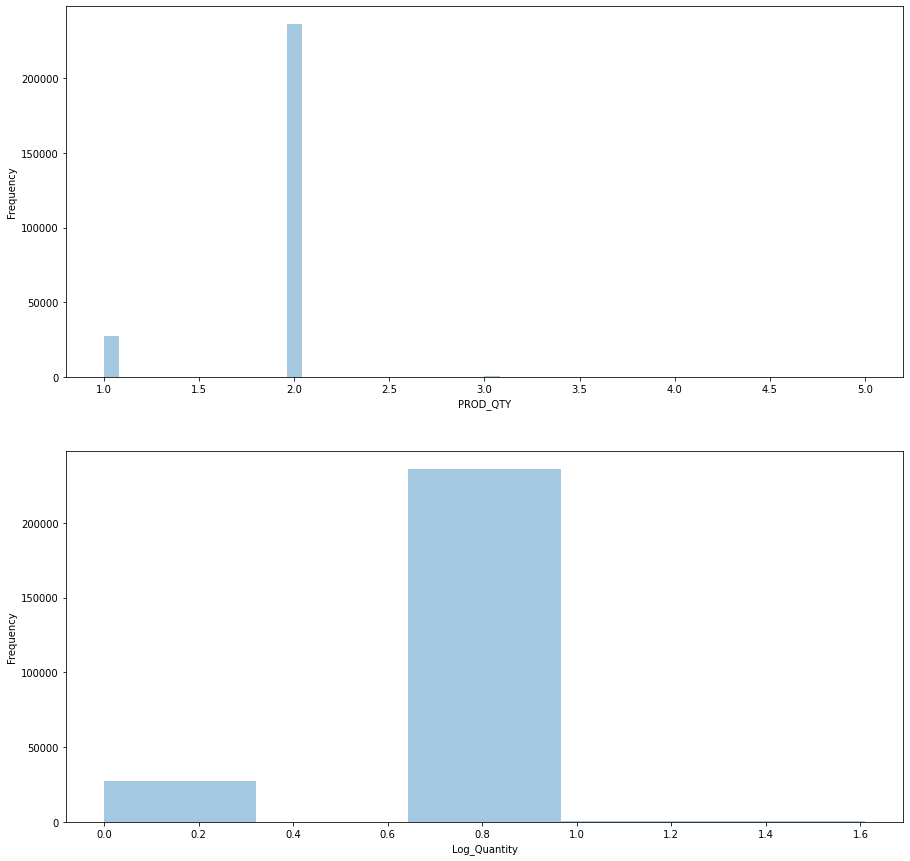

In [21]:
#see the distribution
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(transaction_df.PROD_QTY, ax=ax[0], kde=False)
ax[0].set_ylabel('Frequency')
sns.distplot(np.log(transaction_df.PROD_QTY), ax=ax[1], bins=5, kde=False)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log_Quantity");

In [22]:
#Take the exponent of 4 with quantile of 0.95
np.exp(0.9),np.quantile(transaction_df.PROD_QTY, 0.95)

(2.45960311115695, 2.0)

In [23]:
#Take 95% of the data with maximum quantity at 55
transaction_df = transaction_df.loc[transaction_df.PROD_QTY < 2.5]

C:\Users\Alifia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


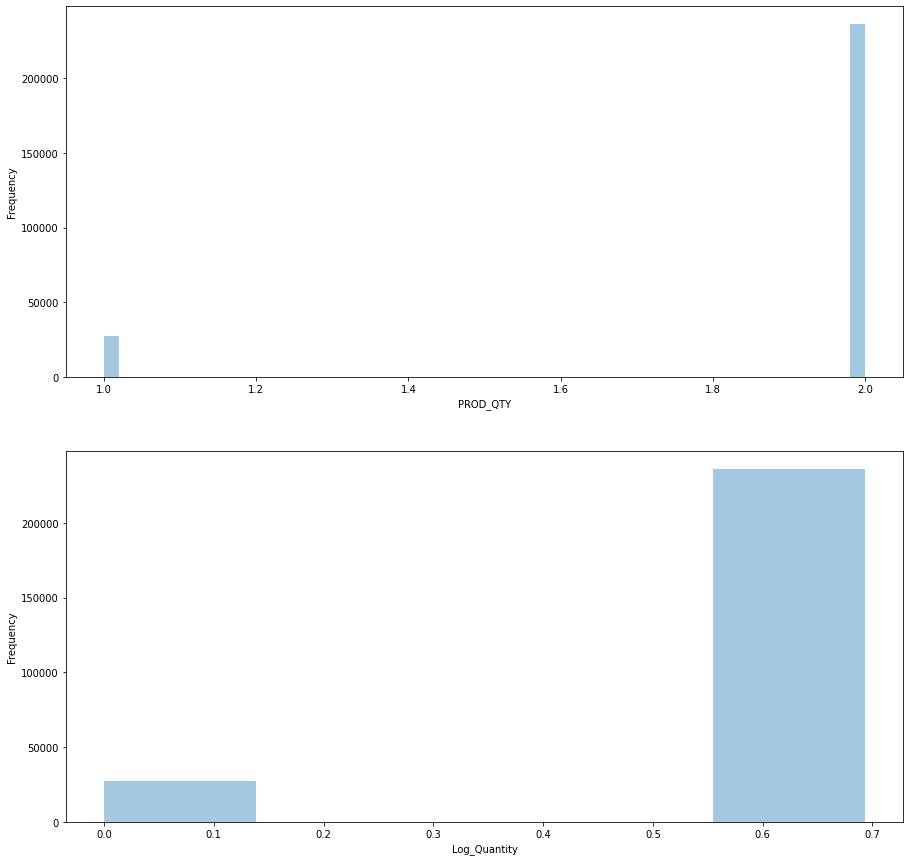

In [24]:
#see the distribution
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(transaction_df.PROD_QTY, ax=ax[0], kde=False)
ax[0].set_ylabel('Frequency')
sns.distplot(np.log(transaction_df.PROD_QTY), ax=ax[1], bins=5, kde=False)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log_Quantity");

In [25]:
transaction_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,263557.000000,2.635570e+05,2.635570e+05,263557.000000,263557.000000,263557.000000
mean,135.077748,1.355486e+05,1.351565e+05,56.582997,1.895590,7.262168
std,76.781524,8.059546e+04,7.813095e+04,32.825682,0.305792,2.448429
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760300e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303560e+05,1.351340e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026990e+05,85.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,2.000000,13.000000


## Exploratory Data Analysis

In [26]:
#count the number of transaction by date
transaction_df["DATE"].value_counts()

2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-08-17    615
2019-05-17    605
2018-08-20    603
2019-05-18    599
2019-05-15    589
Name: DATE, Length: 364, dtype: int64

In [27]:
#create a sequence of dates
start = datetime.datetime.strptime("1-07-2018", "%d-%m-%Y")
end = datetime.datetime.strptime("30-06-2019", "%d-%m-%Y")

d_sq = []
date_seq = pd.date_range(start,end).to_pydatetime().tolist()    
d_sq.append(date_seq)

SEQ_DATE= pd.DataFrame(d_sq)
SEQ_DATE=SEQ_DATE.T #transpose the data
SEQ_DATE.columns=['DATE']


In [28]:
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,2,6.0
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9
5,2019-05-19,4,4074,2982,57,old el paso salsa dip tomato mild,1,5.1
6,2019-05-16,4,4149,3333,16,smiths crinkle chips salt vinegar,1,5.7
7,2019-05-16,4,4196,3539,24,grain waves sweet chilli,1,3.6
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,kettle sweet chilli and sour cream,2,10.8
264832,2018-08-13,272,272358,270154,74,tostitos splash of lime,1,4.4
264833,2018-11-06,272,272379,270187,51,doritos mexicana,2,8.8
264834,2018-12-27,272,272379,270188,42,doritos corn chip mexican jalapeno,2,7.8


In [29]:
#join sequence date to data
df_inner = pd.merge(transaction_df, SEQ_DATE, on='DATE', how='right')

df_inner

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-07-01,47.0,47142.0,42540.0,14.0,smiths crnkle chip orgnl big bag,2.0,11.8
1,2018-07-01,55.0,55073.0,48884.0,99.0,pringles sthrn friedchicken,2.0,7.4
2,2018-07-01,55.0,55073.0,48884.0,91.0,ccs tasty cheese,2.0,4.2
3,2018-07-01,58.0,58351.0,54374.0,102.0,kettle mozzarella basil pesto,2.0,10.8
4,2018-07-01,68.0,68193.0,65598.0,44.0,thins chips light tangy,2.0,6.6
...,...,...,...,...,...,...,...,...
263553,2019-06-30,242.0,242159.0,246222.0,36.0,kettle chilli,2.0,10.8
263554,2019-06-30,244.0,244213.0,247339.0,93.0,doritos corn chip southern chicken,2.0,7.8
263555,2019-06-30,256.0,256018.0,255130.0,105.0,woolworths cheese rings,2.0,3.6
263556,2019-06-30,257.0,257079.0,256218.0,71.0,twisties cheese burger,2.0,8.6


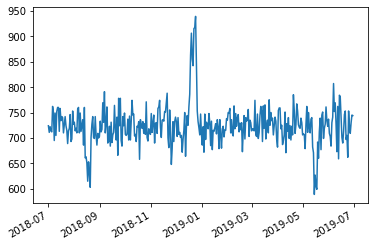

In [32]:
#number of transaction plot
transaction_df["DATE"].value_counts().plot()